In [1]:
import pandas as pd
import os
import json
import numpy as np

In [2]:
df = pd.DataFrame(columns=["Name", "best validation loss", "best epoch", "tot epoch", "mean(loss[-5:])",
                           "criterion", "unet_weights", "resnet_weights", "resnet_trainable", "augmentation",
                           "batch_size", "do_batch_norm", "adam_regul_factor", "no_dropout", "learning_rate", 
                           "lr_sch_patience", "latent_shape", "dropout_conv", "resnet_no_sigmoid_activation",
                           "resnet_fc_cutoff"])

In [3]:
def append_data_to_dataframe(df, parent, ignore_keys):

    dirs = os.listdir(parent)
    for training in dirs:
        path = os.path.join(parent, training)
        json_path = os.path.join(path, "args.json")

        if not os.path.exists(json_path):
            continue

        with open(json_path) as file:
            config = json.load(file)
        config["Name"] = training
        
        try:
            loss_val = np.load(os.path.join(path, "_loss_val.npy"))
            config["best validation loss"] = np.min(loss_val)
            config["best epoch"] = np.argmin(loss_val) + 1
            config["tot epoch"] = len(loss_val)
            config["mean(loss[-5:])"] = np.mean(loss_val[-5:])
        except:
            pass
        for ig_key in ignore_keys:
            config.pop(ig_key, None)
        df = df.append(config, ignore_index=True)
    return df

In [4]:

pd.set_option('display.max_rows', None)

In [5]:
parent = "_full_training"
ignore_keys = ["feature_shape", "resnet_out_shape", "unet_trainable", "path_prefix", 
              "endnet_minimal", "early_stopping", "epochs", "absolute_training_size", "cuda_device", 
              "get_abbrev_only", "get_path_only", "get_cuda_device_count_only", "no_drop_last", "use_lr_scheduler",
               "path"
              ]

df = append_data_to_dataframe(df, parent, ignore_keys)

In [6]:
parent = "_full_training/_early_stopped"
df = append_data_to_dataframe(df, parent, ignore_keys)

In [7]:
parent = "_full_training/_early_stopped/_w00"
df = append_data_to_dataframe(df, parent, ignore_keys)

In [14]:
df[df.criterion=="CEBAL"][df.latent_shape==64][df.learning_rate==0.00001].sort_values(by=["best validation loss"])

/home/students/patzig/aml37/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Name,best validation loss,best epoch,tot epoch,mean(loss[-5:]),criterion,unet_weights,resnet_weights,resnet_trainable,augmentation,batch_size,do_batch_norm,adam_regul_factor,no_dropout,learning_rate,lr_sch_patience,latent_shape,dropout_conv,resnet_no_sigmoid_activation,resnet_fc_cutoff
9,26-09_05-02_aDAOG_cCEBAL_b100_e200_lr1e-05_lrs...,1.261139,20,33,1.286259,CEBAL,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_...,_weights/balanced_BCEwLLoss_labels0_resnet18_e...,True,DAOG,100,False,0,False,0.00001,5,64,False,True,9
3,26-09_03-29_aDAOG_cCEBAL_b100_e200_lr1e-05_lrs...,1.266256,27,35,1.316602,CEBAL,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_...,_weights/balanced_BCEwLLoss_labels0_resnet18_e...,True,DAOG,100,False,0,False,0.00001,5,64,True,True,9
36,26-09_09-35_aDAOG_cCEBAL_b100_e200_lr1e-05_lrs...,1.268142,25,27,1.290087,CEBAL,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_...,_weights/balanced_BCEwLLoss_labels1_resnet18_e...,True,DAOG,100,False,0,False,0.00001,5,64,False,True,9
23,26-09_06-34_aDAOG_cCEBAL_b100_e200_BN_lr1e-05_...,1.274618,15,27,1.334844,CEBAL,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_...,_weights/balanced_BCEwLLoss_labels0_resnet18_e...,True,DAOG,100,True,0,True,0.00001,5,64,False,True,9
16,26-09_19-28_aDAOG_cCEBAL_b100_e200_lr1e-05_lrs...,1.294076,22,27,1.314837,CEBAL,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_...,_weights/balanced_BCEwLLoss_labels2_resnet18_e...,True,DAOG,100,False,0,False,0.00001,5,64,False,True,9
46,26-09_17-16_aDAOG_cCEBAL_b100_e200_lr1e-05_lrs...,1.302473,22,37,1.341578,CEBAL,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_...,_weights/balanced_BCEwLLoss_labels2_resnet18_e...,True,DAOG,100,False,0,False,0.00001,5,64,True,True,9


In [9]:
df.sort_values(by=["Name"])

,Name,best validation loss,best epoch,tot epoch,mean(loss[-5:]),criterion,unet_weights,resnet_weights,resnet_trainable,augmentation,batch_size,do_batch_norm,adam_regul_factor,no_dropout,learning_rate,lr_sch_patience,latent_shape,dropout_conv,resnet_no_sigmoid_activation,resnet_fc_cutoff
56,23-09_17-11__b100_e200_BN,1.611644,2,2,891.948410,NaN,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_...,_weights/2021-09-23T00:08oresnet18_lr=0.0001_t...,NaN,NA,100,True,0,NaN,0.00100,10,NaN,NaN,NaN,9
60,23-09_18-29__b100_e200_BN_lrsp10,143.188482,1,1,143.188482,NaN,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_...,_weights/2021-09-23T00:08oresnet18_lr=0.0001_t...,NaN,NA,100,True,0,NaN,0.10000,10,NaN,NaN,NaN,9
17,23-09_18-32_aNA_b100_e200_BN_lrsp10,1.608445,42,44,1.612910,NaN,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_...,_weights/2021-09-23T00:08oresnet18_lr=0.0001_t...,NaN,NA,100,True,0,NaN,0.10000,10,NaN,NaN,NaN,9
7,23-09_20-07_aNA_cCE_b100_e200_BN_lrsp10,1.322230,184,200,1.340478,CE,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_...,_weights/2021-09-23T00:08oresnet18_lr=0.0001_t...,NaN,NA,100,True,0,NaN,0.10000,10,NaN,NaN,NaN,9
53,24-09_08-42_aNA_cCE_b100_e200_BN_lrsp10,1.071487,5,24,1.552312,CE,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_...,_weights/2021-09-23T00:08oresnet18_lr=0.0001_t...,NaN,NA,100,True,0,NaN,0.00100,10,NaN,NaN,NaN,9
30,24-09_09-12_aNA_cCE_b100_e200_BN_lrsp10,1.030430,98,200,1.078604,CE,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_...,_weights/oresnet18_24-09_01-34_NewLoss_e12.ckpt,NaN,NA,100,True,0,NaN,0.00001,10,NaN,NaN,False,9
51,24-09_09-28_aNA_cCE_b100_e200_BN_lrsp10_nosig,1.003890,7,141,1.130441,CE,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_...,_weights/oresnet18_24-09_01-34_NewLoss_e12.ckpt,NaN,NA,100,True,0,NaN,0.00001,10,NaN,NaN,True,9
5,24-09_10-28_aNA_cCE_b100_e200_BN_lr1e-05_lrsp1...,1.020377,16,166,1.088642,CE,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_...,_weights/resnet2222_24-09_01-38_NewLoss_e12.ckpt,NaN,NA,100,True,0,NaN,0.00001,10,NaN,NaN,True,None
41,24-09_14-52_aNA_cCE_b100_e200_BN_lr1e-05_lrsp1...,1.016682,7,200,1.106421,CE,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_...,_weights/oresnet18_24-09_01-34_NewLoss_e12.ckpt,NaN,NA,100,True,0,False,0.00001,10,NaN,NaN,True,9
24,24-09_17-54_aNA_cCE_b100_e200_BN_lr1e-05_lrsp1...,1.020760,81,200,1.084238,CE,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_...,_weights/resnet2222_24-09_01-38_NewLoss_e12.ckpt,NaN,NA,100,True,0,False,0.00001,10,NaN,NaN,True,None


In [18]:
a = ["_full_training/26-09_05-02_aDAOG_cCEBAL_b100_e200_lr1e-05_lrsp5_es_nosig_fcc9_mini_ls64_nodoconv/",
 "_full_training/26-09_09-35_aDAOG_cCEBAL_b100_e200_lr1e-05_lrsp5_es_nosig_fcc9_mini_ls64_nodoconv/",
"_full_training/26-09_19-28_aDAOG_cCEBAL_b100_e200_lr1e-05_lrsp5_es15_nosig_fcc9_mini_ls64_nodoconv/"
]

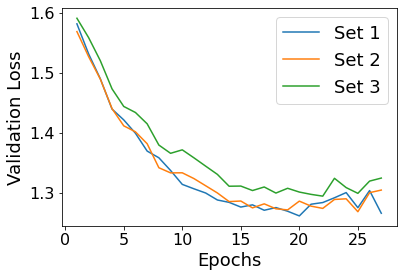

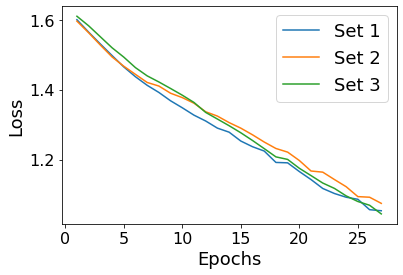

In [34]:
import matplotlib.pyplot as plt
from matplotlib import rc

# latex text in plots
usetex = False
if usetex:
    rc('text', usetex=True)
else:
    rc('text', usetex=False)

#change plt parameter globally 
plt.rcParams.update({'font.size': 18,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16})

min_e = 300
for path in a:
    loss_val = np.load(os.path.join(path, "_loss_val.npy"))
    loss = np.load(os.path.join(path, "_loss.npy"))
    if len(loss_val) < min_e:
        min_e = len(loss_val)
min_e
epochs = np.arange(1,min_e+1)
i = 0
for path in a:
    i += 1
    loss_val = np.load(os.path.join(path, "_loss_val.npy"))
    loss = np.load(os.path.join(path, "_loss.npy"))
    plt.plot(epochs, loss_val[:min_e], label=f"Set {i}")
    plt.xlabel("Epochs")
    plt.ylabel("Validation Loss")
plt.legend()

plt.figure()
i = 0
for path in a:
    i += 1
    loss_val = np.load(os.path.join(path, "_loss_val.npy"))
    loss = np.load(os.path.join(path, "_loss.npy"))
    plt.plot(epochs, loss[:min_e], label=f"Set {i}")    
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
plt.legend()